In [1]:
import ipywidgets as widgets
from IPython.display import display, HTML

javascript_functions = {False: "hide()", True: "show()"}
button_descriptions  = {False: "Show code", True: "Hide code"}


def toggle_code(state):

    """
    Toggles the JavaScript show()/hide() function on the div.input element.
    """

    output_string = "<script>$(\"div.input\").{}</script>"
    output_args   = (javascript_functions[state],)
    output        = output_string.format(*output_args)

    display(HTML(output))


def button_action(value):

    """
    Calls the toggle_code function and updates the button description.
    """

    state = value.new

    toggle_code(state)

    value.owner.description = button_descriptions[state]


state = False
toggle_code(state)

button = widgets.ToggleButton(state, description = button_descriptions[state])
button.observe(button_action, "value")

display(button)



ToggleButton(value=False, description='Show code')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv(r'D:\Desktop\APLIKACJE\studia\licencjat\projekt\results.csv')

In [4]:
def scatter_plt(data, funds):
    sns.set_style('darkgrid')
    plt.figure(figsize= (12,8))
    data = data[data['funds_name'] == funds]
    title = data['algorithms'].values[0] + ' ' + data['funds_name'].values[0]
    sns.scatterplot(y= 'value', x = 't', hue= 'outlier', data = data, s= 70)
    sns.lineplot(y= 'value', x = 't', data = data)
    plt.title(title)
    plt.show()


In [5]:
def box_plots(data, funds):
    sns.set_style('darkgrid')
    plt.figure(figsize= (12,8))
    data = data[data['funds_name'] == funds]
    data['year'] = data['Data'].astype(str).str[:4]
    title = data['algorithms'].values[0] + ' ' + data['funds_name'].values[0]
    sns.boxplot(y= 'value', x = 'year', data = data, color="skyblue")
    plt.title(title)
    plt.show()


In [6]:
def select_funds():
    df = data.pivot_table(values= 'value', index='Data', columns= 'funds_name').corr()
    corrs = {fund: df[np.abs(df[fund])> 0.9].index[0]  for fund in df.index}
    corrs = pd.Series(corrs).unique()
    
    return corrs

Ramka danych zawierająca wyniki działania modelu

kolumny:
* funds_name: nazwa funduszu
* rq: wartość stosunku odchylenie ćwiartkowego do mediany, będąca wyznacznikiem tego jaki algorytm zostanie użyty
* algorithms: nazwa użytego algorytmu
* Data: data w do której odnosi się wartość obserwacji
* value: wartość obserwacji
* cluster, cluster_center, diff, mean_diff, std_diff,critical_value: dotyczą modeli wykonanych za pomoca algorytmu k-średnich
* outlier: zmienna informująca czy obserwacja jest obserwacją odstającą
* t: tożsama z Data, numer okresu do którego odnosi się wartość obserwacji

In [7]:
data.head().iloc[:,1 :-1]

,funds_name,rq,algorithms,Data,value,cluster,cluster_center,diff,mean_diff,std_diff,critical_value,outlier,t
0,Pekao Zrównowa¿ony kat. A (PLN),0.151192,if_results,1992-07-28,10.00,NaN,NaN,NaN,NaN,NaN,NaN,True,0
1,Pekao Zrównowa¿ony kat. A (PLN),0.151192,if_results,1992-07-29,10.00,NaN,NaN,NaN,NaN,NaN,NaN,True,1
2,Pekao Zrównowa¿ony kat. A (PLN),0.151192,if_results,1992-07-30,10.00,NaN,NaN,NaN,NaN,NaN,NaN,True,2
3,Pekao Zrównowa¿ony kat. A (PLN),0.151192,if_results,1992-08-06,10.06,NaN,NaN,NaN,NaN,NaN,NaN,True,3
4,Pekao Zrównowa¿ony kat. A (PLN),0.151192,if_results,1992-08-13,10.12,NaN,NaN,NaN,NaN,NaN,NaN,True,4


Wymiary tablicy:

In [8]:
data.shape

(250392, 15)

Statystyki dla danego funduszu:

In [9]:
data.groupby('funds_name')['value'].describe().iloc[:30]

,count,mean,std,min,25%,50%,75%,max
funds_name,,,,,,,,
Pekao Akcji ? Aktywna Selekcja kat. A (PLN),2291.0,9.988542,0.995265,7.39,9.280,10.090,10.7650,11.92
Pekao Akcji ? Aktywna Selekcja kat. E (PLN),1303.0,10.126086,0.872790,8.08,9.560,10.130,10.8400,11.92
Pekao Akcji ? Aktywna Selekcja kat. I (PLN),2291.0,10.037682,1.016492,7.39,9.285,10.220,10.7900,11.99
Pekao Akcji Amerykañskich kat. A (PLN),4939.0,77.889617,23.077363,36.97,61.160,69.110,98.9350,141.86
Pekao Akcji Amerykañskich kat. A (USD),4102.0,23.229612,5.095693,10.90,19.530,22.195,27.1475,35.80
Pekao Akcji Amerykañskich kat. E (PLN),4482.0,83.155518,28.236704,39.37,62.690,71.265,111.8275,160.45
Pekao Akcji Amerykañskich kat. I (PLN),4481.0,89.577710,32.744984,41.65,65.550,75.070,122.6400,179.59
Pekao Akcji Amerykañskich kat. I (USD),4102.0,27.256451,7.224226,12.36,21.570,25.060,32.8400,45.33
Pekao Akcji Europejskich kat. A (EUR),3965.0,9.785367,1.815078,4.90,8.340,10.210,11.3200,12.91


In [10]:
data.groupby('funds_name')['value'].describe().iloc[30:60]

,count,mean,std,min,25%,50%,75%,max
funds_name,,,,,,,,
Pekao Konserwatywny Plus kat. E (PLN),1607.0,10.787007,0.411800,10.00,10.5100,10.730,11.1300,11.60
Pekao Konserwatywny Plus kat. I (PLN),1607.0,10.855358,0.454170,10.00,10.5500,10.800,11.2400,11.75
Pekao Konserwatywny kat. A (PLN),4619.0,157.820377,28.476186,100.62,133.8000,159.650,184.9000,200.44
Pekao Konserwatywny kat. E (PLN),1303.0,190.897974,4.983580,183.68,186.3900,189.920,195.1300,200.44
Pekao Konserwatywny kat. I (PLN),4373.0,160.707821,26.446148,111.65,136.9200,162.660,185.3500,200.44
Pekao Ma³ych i ¦rednich Spó³ek Rynku Polskiego kat. A (PLN),3652.0,10.869425,3.976763,5.57,8.8800,9.800,11.3000,27.84
Pekao Ma³ych i ¦rednich Spó³ek Rynku Polskiego kat. E (PLN),1303.0,9.728434,0.848286,8.14,9.0800,9.570,10.3700,11.44
Pekao Ma³ych i ¦rednich Spó³ek Rynku Polskiego kat. I (PLN),3652.0,10.768217,3.526622,5.26,9.1975,10.180,11.3600,25.85
Pekao Megatrendy (PLN),178.0,10.398764,0.345397,9.87,10.1500,10.285,10.6200,11.23


In [11]:
data.groupby('funds_name')['value'].describe().iloc[60:]

,count,mean,std,min,25%,50%,75%,max
funds_name,,,,,,,,
Pekao Obligacji i Dochodu (PLN),1404.0,11.083561,0.648749,9.72,10.4400,11.280,11.6200,12.30
Pekao PPK 2020 Spokojne Jutro kat. A (PLN),44.0,10.003636,0.005323,10.00,10.0000,10.000,10.0100,10.02
Pekao PPK 2025 (PLN),55.0,10.067091,0.064569,10.00,10.0200,10.050,10.0850,10.19
Pekao PPK 2030 (PLN),55.0,10.086000,0.089971,10.00,10.0200,10.050,10.1100,10.27
Pekao PPK 2035 (PLN),55.0,10.099091,0.113109,10.00,10.0200,10.050,10.1200,10.34
Pekao PPK 2040 (PLN),55.0,10.115818,0.129482,10.00,10.0200,10.070,10.1400,10.39
Pekao PPK 2045 (PLN),55.0,10.120909,0.138327,10.00,10.0200,10.070,10.1450,10.41
Pekao PPK 2050 (PLN),55.0,10.104909,0.132258,10.00,10.0200,10.040,10.1250,10.39
Pekao PPK 2055 (PLN),55.0,10.091455,0.129077,10.00,10.0100,10.020,10.1000,10.37


Wykresy skrzypcowe dla wybranych danych

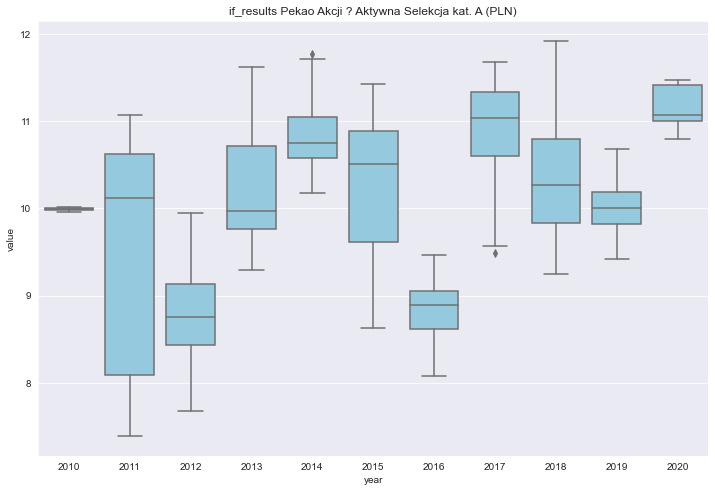

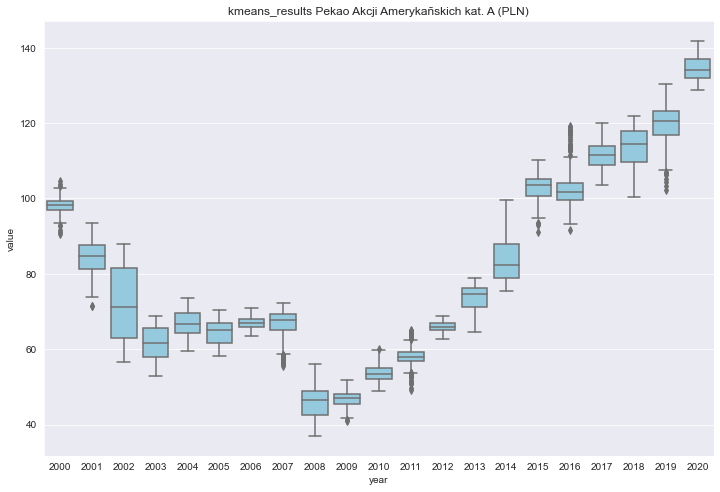

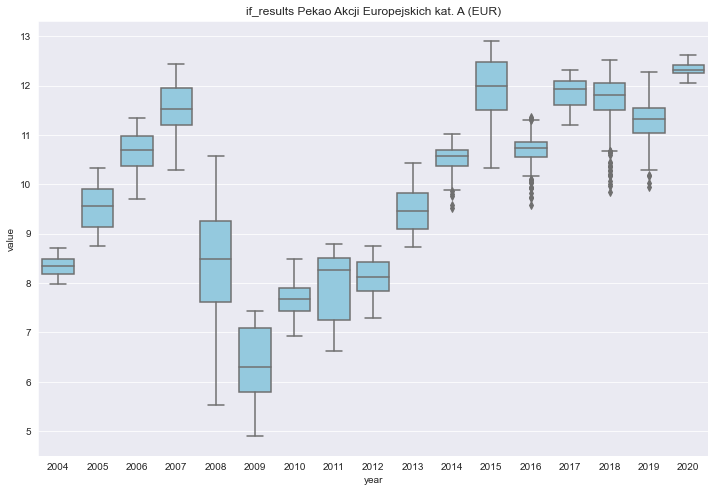

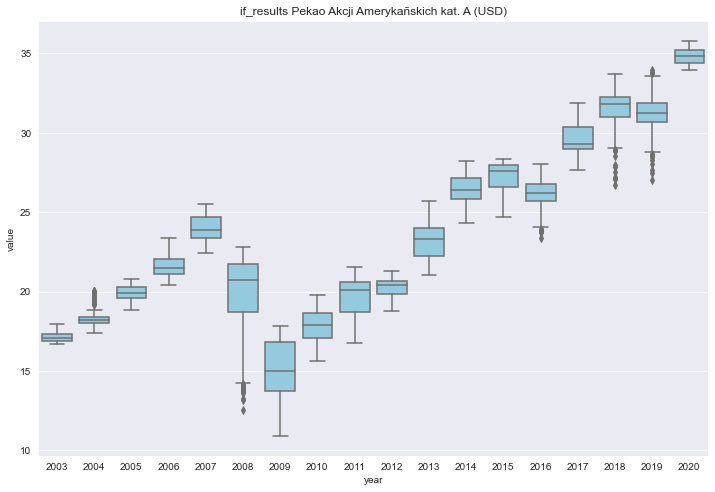

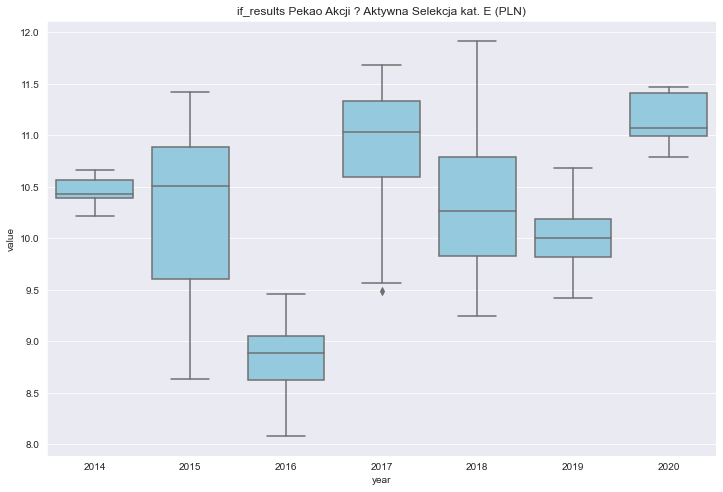

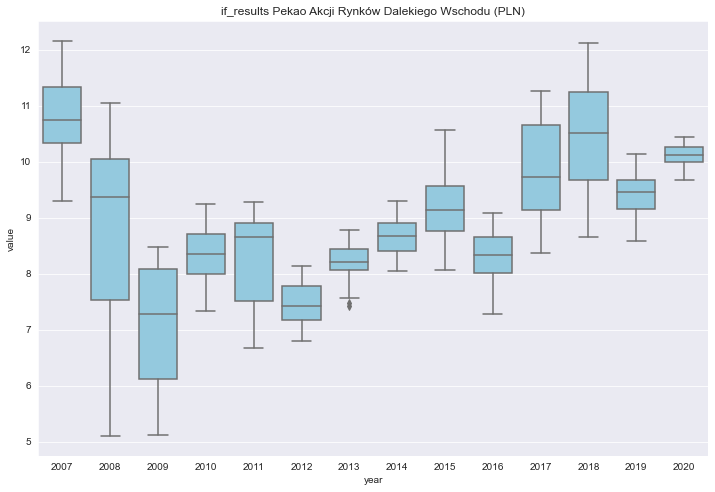

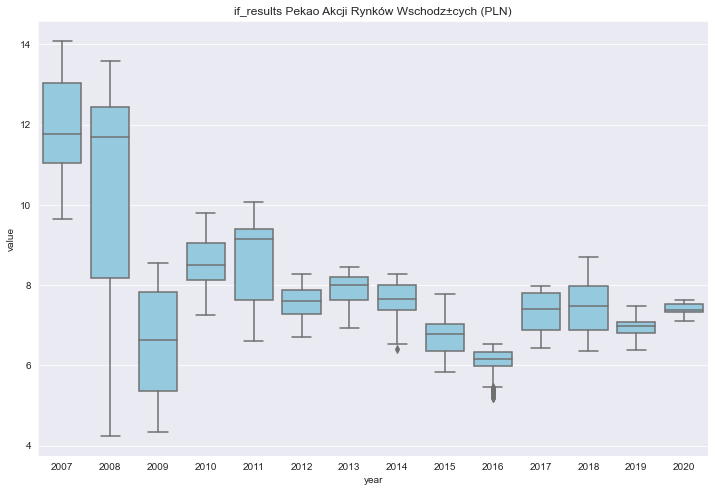

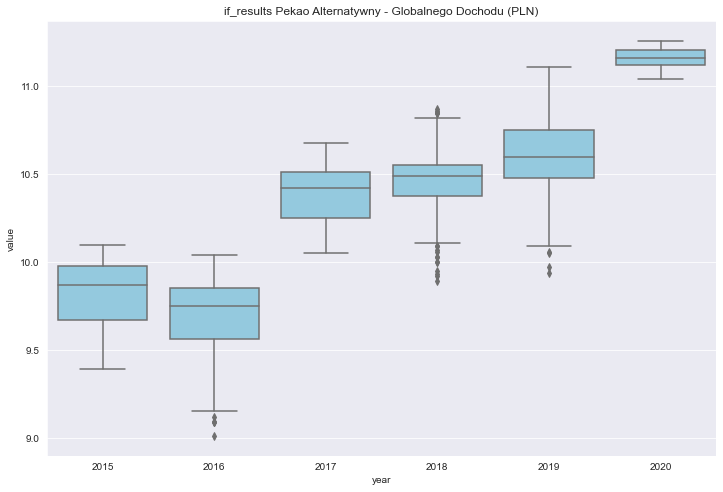

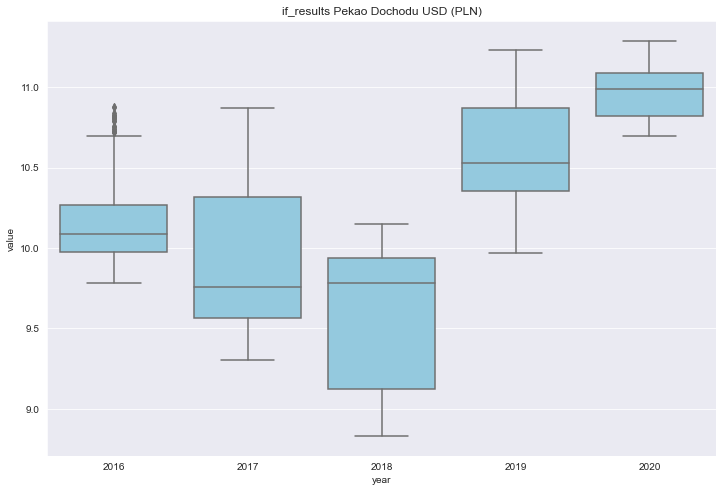

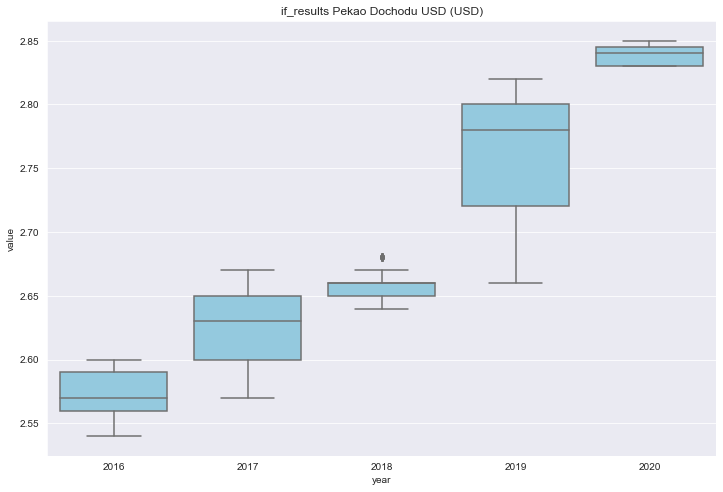

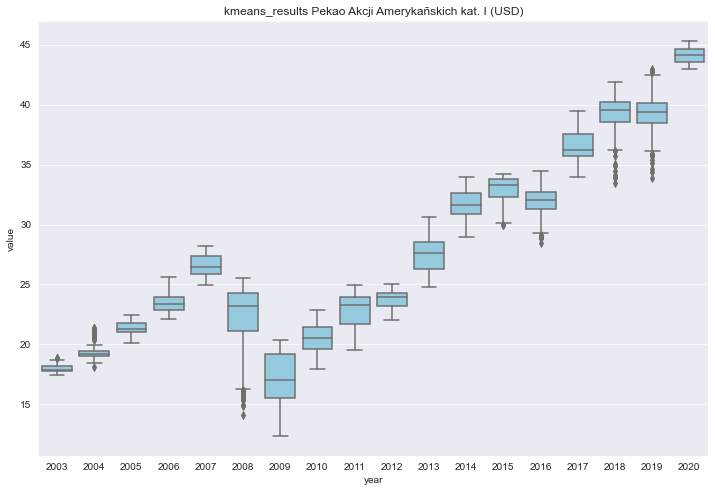

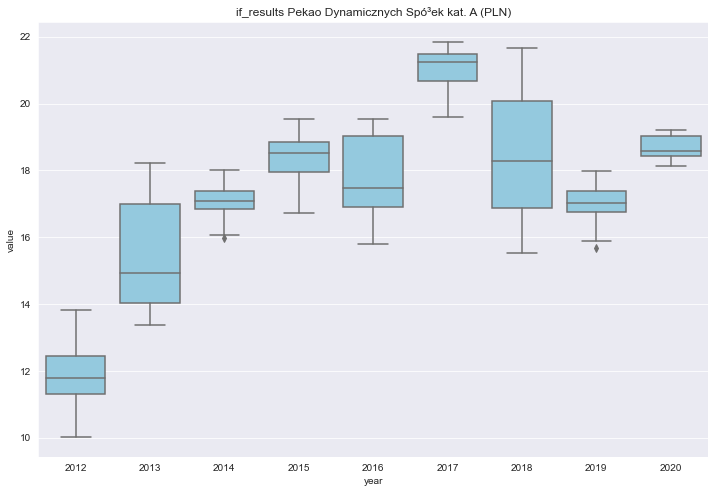

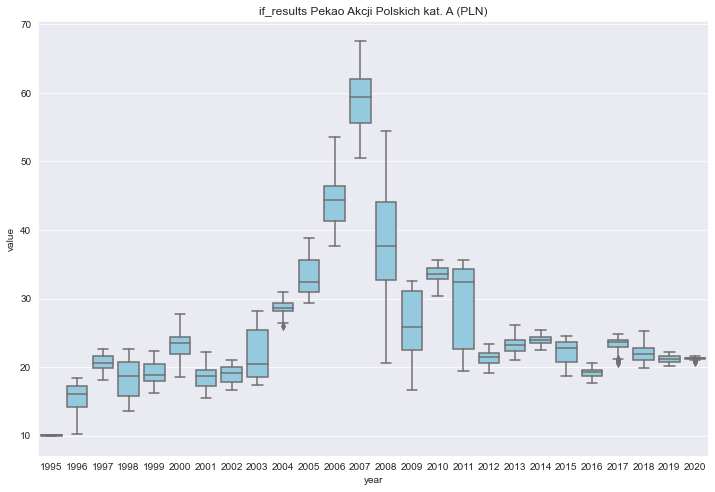

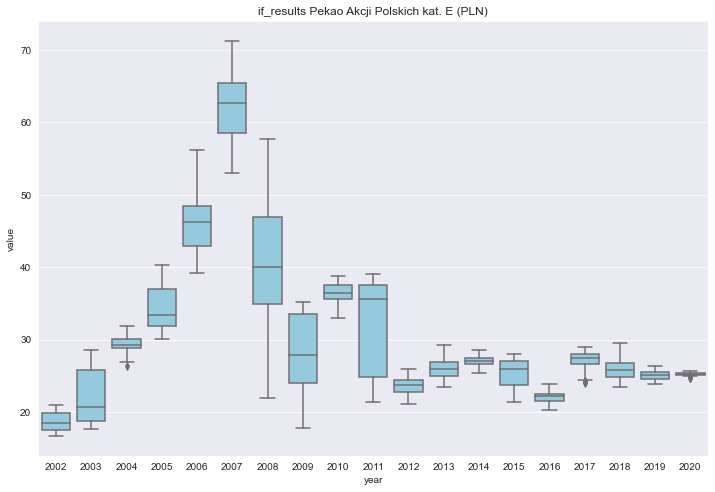

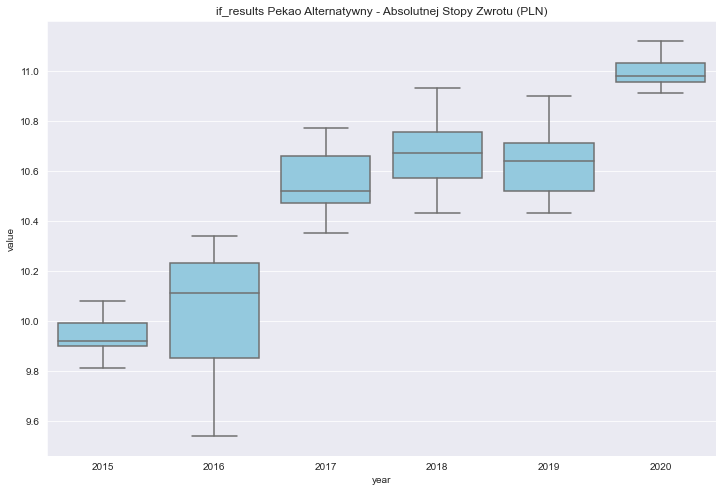

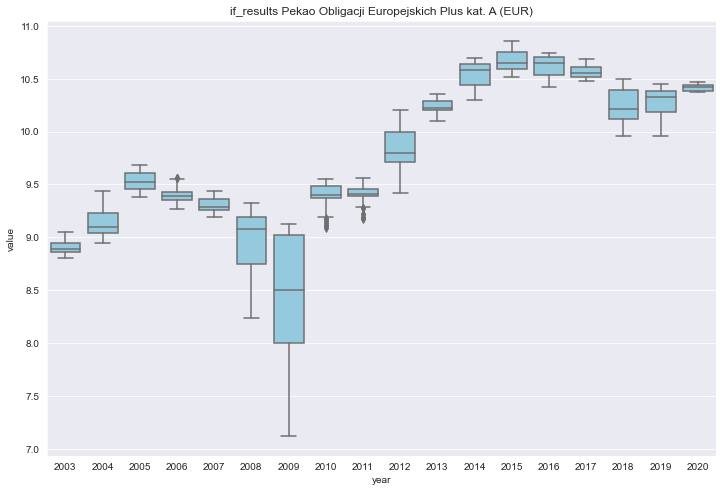

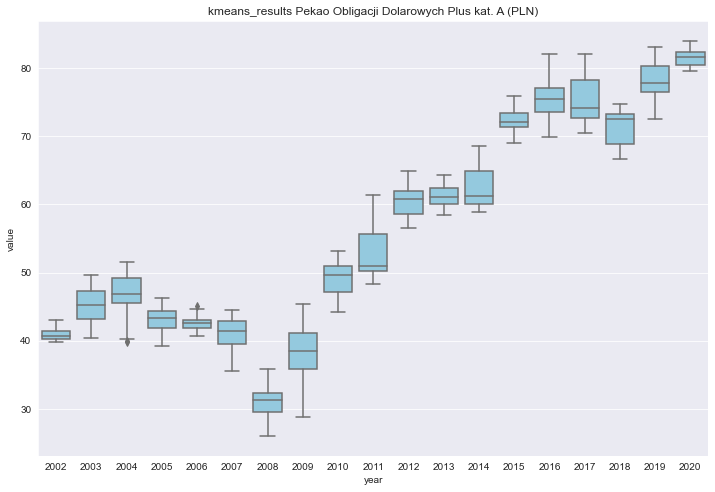

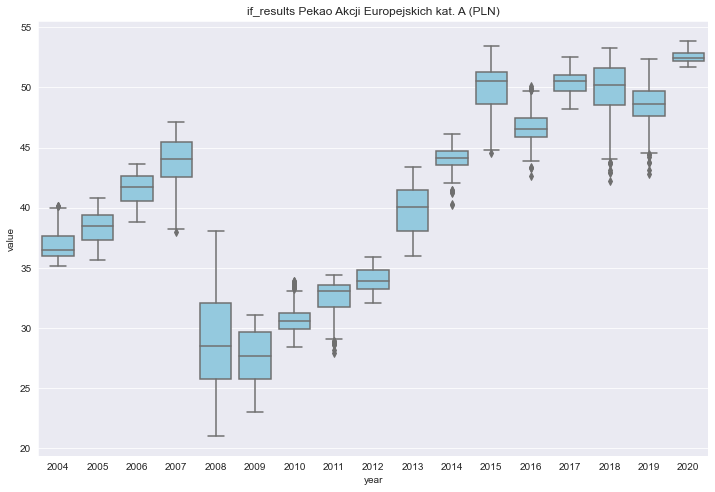

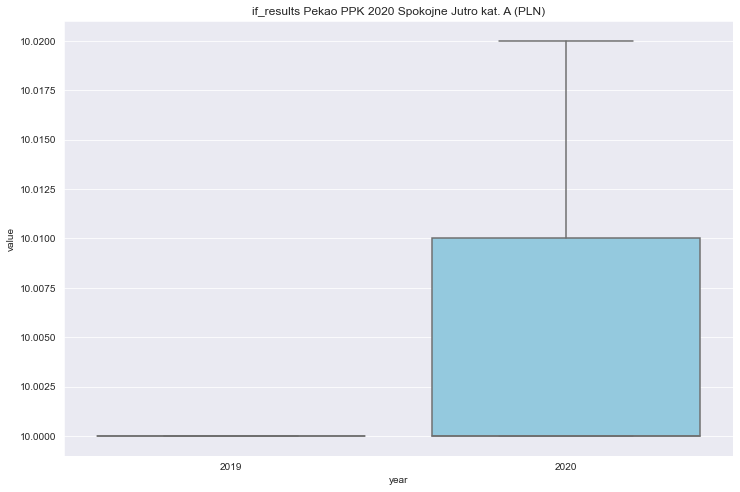

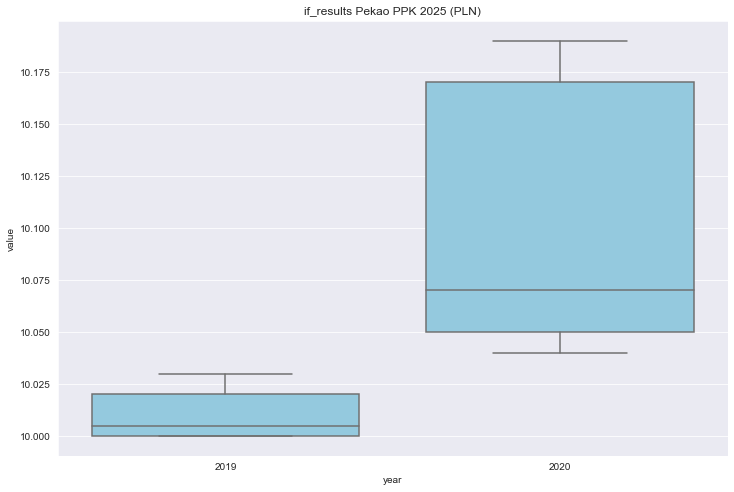

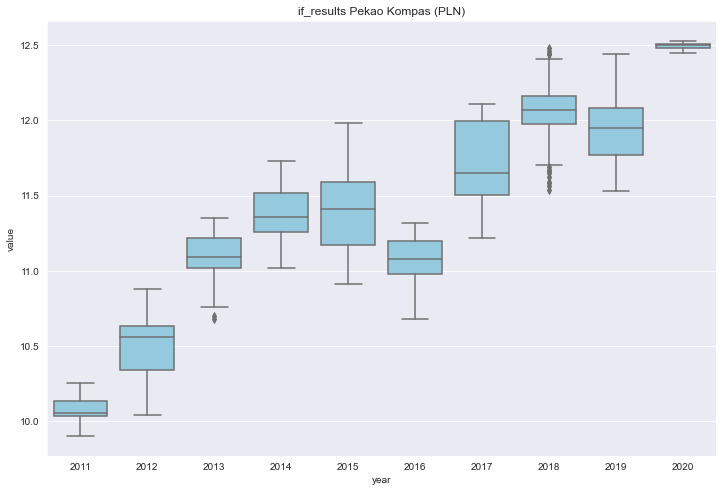

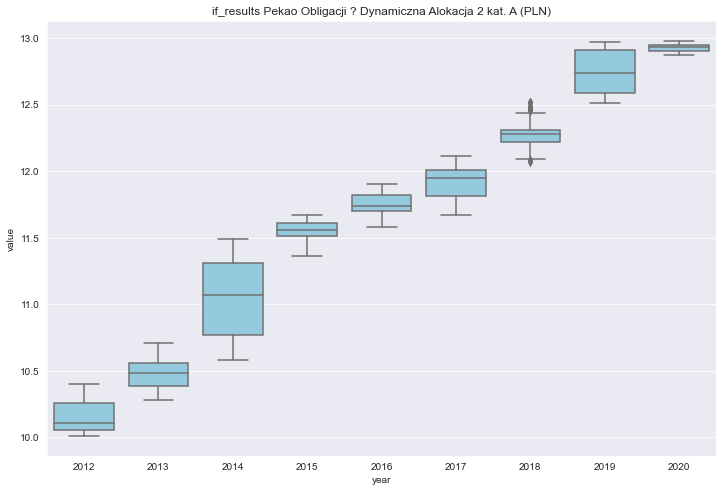

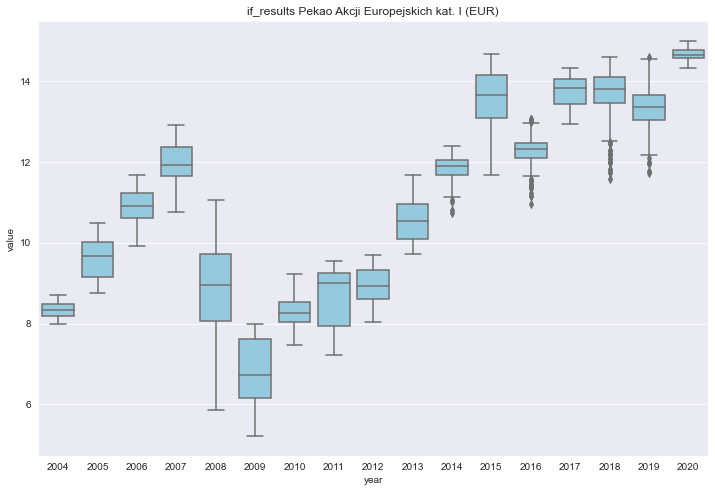

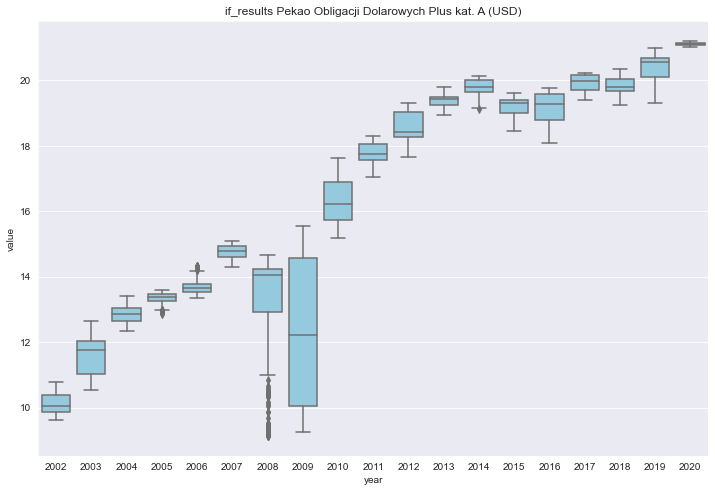

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [12]:
[box_plots(data, col) for col in select_funds()]

Na poniższych wykresach zaprezentowano działnie modelu
* na niebiesko zaznaczono obserwacje nie wchodzące w skład obserwacji odstających
* na pomarańczowo obserwacje odstające

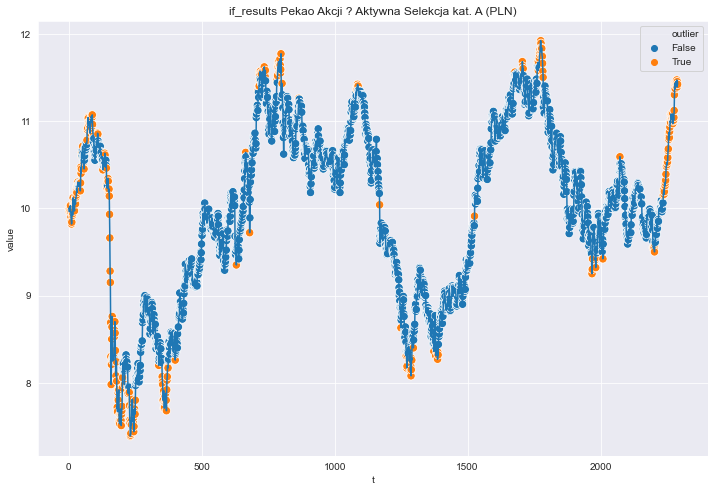

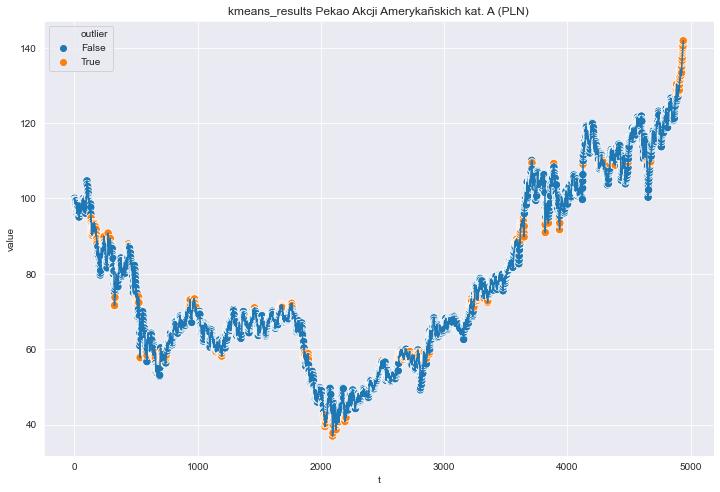

In [ ]:
[scatter_plt(data, col) for col in select_funds()]